<a href="https://colab.research.google.com/github/Mubashar-Bashir/Langchain_EcoSystem/blob/main/Tem_Gem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
%%capture --no-stderr
%pip install -U langgraph langsmith langchain_google_genai langchain_community

In [40]:
!pip install --q --upgrade langchain-groq
from langchain_groq import ChatGroq

In [41]:
import os
from google.colab import userdata

os.environ["LANGCHAIN_API_KEY"] = userdata.get('LANGCHAIN_API_KEY')
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "Excise_Taxation_MVR"
os.environ["TAVILY_API_KEY"] = userdata.get('TAVILY_API_KEY')
os.environ["GROQ_API_KEY"] = userdata.get('GROQ_API_KEY')

gemini_api_key = userdata.get('GEMINI_API_KEY')
tavily_api_key = userdata.get('TAVILY_API_KEY')
tavily_api_key = userdata.get('GROQ_API_KEY')

In [44]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_groq import ChatGroq
llm_groq = ChatGroq(
    temperature=0,
    model_name="mixtral-8x7b-32768",
    #api_key=GROQ_API_KEY
    )


In [45]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash",
    max_retries=2,
    api_key=gemini_api_key
)

llm_groq.invoke("greet me")

AIMessage(content="Hello! It's nice to meet you. Is there something specific you would like to talk about or ask me? I'm here to help with any questions you have to the best of my ability.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 43, 'prompt_tokens': 11, 'total_tokens': 54, 'completion_time': 0.066444212, 'prompt_time': 0.001924024, 'queue_time': 0.012528165, 'total_time': 0.068368236}, 'model_name': 'mixtral-8x7b-32768', 'system_fingerprint': 'fp_c5f20b5bb1', 'finish_reason': 'stop', 'logprobs': None}, id='run-55c1163c-cb65-47de-b991-99492bacd72a-0', usage_metadata={'input_tokens': 11, 'output_tokens': 43, 'total_tokens': 54})

In [29]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash",
    max_retries=2,
    api_key=gemini_api_key
)

llm.invoke("greet me")

AIMessage(content='Hello there!  How are you doing today?\n', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-dfb1fd76-7a35-4b09-af6c-d00b971c7565-0', usage_metadata={'input_tokens': 3, 'output_tokens': 11, 'total_tokens': 14, 'input_token_details': {'cache_read': 0}})

In [46]:
from typing_extensions import Annotated
from pydantic import BaseModel
from datetime import date
from typing import Optional
from langgraph.graph.message import add_messages

class Vehicle(BaseModel):
    registration_number:  Optional[str]
    engine_number:        Optional[str]
    make_name:            Optional[str]
    registration_date:    Optional[date]
    year_of_manufacture:  Optional[int]
    vehicle_price:        Optional[float]
    color:                Optional[str]
    token:                Optional[str]


class OwnerBase(BaseModel):
    pass


class Owner(OwnerBase):
    owner_name:           Optional[str]
    father_husband_name:  Optional[str]
    owner_city:           Optional[str]
    cell_number:          Optional[str]


class PaymentBase(BaseModel):
    pass


class Payment(PaymentBase):
    date:         Optional[date]
    amount:       Optional[float]
    payment_type: Optional[str]


class ApplicationBase(BaseModel):
    pass


class Application(ApplicationBase):
    application_type:           Optional[str]
    application_current_status: Optional[str]


class VehicleStatus(BaseModel):
    # messages: Annotated[list, add_messages]
    vehicle: Optional[Vehicle] = None
    owner: Optional[Owner] =None
    payment: Optional[Payment] =None
    application: Optional[Application] =None


class VehicleState(VehicleStatus):
    messages: Annotated[list, add_messages]

In [12]:
from datetime import date

# Sample data for vehicle inquiry
vehicle = Vehicle(
    registration_number="ABC-123",
    engine_number="3G83200608",
    make_name="MITSUBISHI - MINI CAB VAN",
    registration_date=date(2016, 12, 22),
    year_of_manufacture=2012,
    vehicle_price=658134.0,
    color="WHITE",
    token="Life Time"
)

owner = Owner(
    owner_name="MALIK MUHAMMAD YAQOOB",
    father_husband_name="MUHAMMAD KHAN",
    owner_city="CHAKWAL",
    cell_number="1234567890"
)

payment = Payment(
    date=date(2024, 4, 19),
    amount=3030.0,
    payment_type="TRANSFER OF OWNERSHIP"
)

application = Application(
    application_type="TRANSFER OF OWNERSHIP",
    application_current_status="DELIVERED"
)

# VehicleState with messages
state = VehicleState(
    vehicle=vehicle,
    owner=owner,
    payment=payment,
    application=application,
    messages=[]  # Start with an empty message list
)

# Add a user message
state.messages.append({"role": "user", "content": "Check details for vehicle ABC-123."})

# Verify the state
print(state)


vehicle=Vehicle(registration_number='ABC-123', engine_number='3G83200608', make_name='MITSUBISHI - MINI CAB VAN', registration_date=datetime.date(2016, 12, 22), year_of_manufacture=2012, vehicle_price=658134.0, color='WHITE', token='Life Time') owner=Owner(owner_name='MALIK MUHAMMAD YAQOOB', father_husband_name='MUHAMMAD KHAN', owner_city='CHAKWAL', cell_number='1234567890') payment=Payment(date=datetime.date(2024, 4, 19), amount=3030.0, payment_type='TRANSFER OF OWNERSHIP') application=Application(application_type='TRANSFER OF OWNERSHIP', application_current_status='DELIVERED') messages=[{'role': 'user', 'content': 'Check details for vehicle ABC-123.'}]


In [49]:
def fetch_vehicle_details(registration_number:str) -> VehicleState: # Changed parameter name to 'registration_number'
    """
    Fetches vehicle details based on the registration number.

    Args:
        registration_number (str): The vehicle's registration number.

    Returns:
        dict: A dictionary of vehicle details.
    """
    # Mock data (replace with actual API/database calls)
    return {
        "registration_number": registration_number, # Using 'registration_number' here as well
        "engine_number": "3G83200608",
        "make_name": "MITSUBISHI - MINI CAB VAN",
        "registration_date": "2016-12-22",
        "year_of_manufacture": 2012,
        "vehicle_price": 658134.0,
        "color": "WHITE",
        "token": "Life Time",
        "owner_name": "MALIK MUHAMMAD YAQOOB",
        "owner_city": "CHAKWAL",
        "status": "DELIVERED",
    }


In [51]:
from langgraph.graph import START, StateGraph, MessagesState
from langgraph.graph.state import CompiledStateGraph
from langgraph.prebuilt import tools_condition, ToolNode
from langchain_core.messages import SystemMessage
from langchain_google_genai import ChatGoogleGenerativeAI


# Tool List
tools = [fetch_vehicle_details]

# LLM gemini
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")
llm_with_tools = llm.bind_tools(tools)
# LLM Groq
llm_groq = ChatGroq(temperature=0, model_name="mixtral-8x7b-32768")
llm_groq_with_tools = llm_groq.bind_tools(tools)

# System Message
sys_msg = SystemMessage(
    content="You are a helpful assistant that provides vehicle details. "
            "Users will give you a registration number, and you will fetch details for that vehicle."
)

def MVR_assistant(state: VehicleState):
    """
    MVR Assistant node that processes user messages and decides on tool calls for Motor Vehicles.
    Fetches vehicle details based on the registration number from the prompt.
    Updates state.vehicle.registration_number from prompt message.
    """
    # Simulate LLM response processing
    response = llm_groq_with_tools.invoke([sys_msg] + state.messages)
    print(response)
    # Update the state (assumes the LLM's response includes the registration number in a structured way)
    #state.vehicle.registration_number = "Extracted Registration Number"  # Replace with actual extraction logic

    # Append AI response to messages
    return {"messages": response}

# Build Graph
builder = StateGraph(VehicleState)
builder.add_node("MVR_Assistant", MVR_assistant)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "MVR_Assistant")
builder.add_conditional_edges(
    "MVR_Assistant",
    tools_condition,  # Route to tools if a tool call is detected
)
builder.add_edge("tools", "MVR_Assistant")

# Compile Graph
graph = builder.compile()


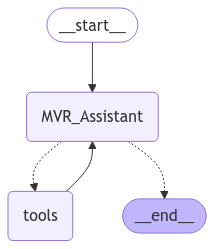

In [52]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [53]:
from langchain_core.messages import HumanMessage

# Invoke the graph
output = graph.invoke({"messages":[HumanMessage("Check details for vehicle ABC-123.")]})
print(output)


content='' additional_kwargs={'tool_calls': [{'id': 'call_grx0', 'function': {'arguments': '{"registration_number":"ABC-123"}', 'name': 'fetch_vehicle_details'}, 'type': 'function'}]} response_metadata={'token_usage': {'completion_tokens': 100, 'prompt_tokens': 1228, 'total_tokens': 1328, 'completion_time': 0.156779405, 'prompt_time': 0.060422637, 'queue_time': 0.0013670640000000012, 'total_time': 0.217202042}, 'model_name': 'mixtral-8x7b-32768', 'system_fingerprint': 'fp_c5f20b5bb1', 'finish_reason': 'tool_calls', 'logprobs': None} id='run-a0457e04-49b8-438d-b9c2-21c84bfe90d7-0' tool_calls=[{'name': 'fetch_vehicle_details', 'args': {'registration_number': 'ABC-123'}, 'id': 'call_grx0', 'type': 'tool_call'}] usage_metadata={'input_tokens': 1228, 'output_tokens': 100, 'total_tokens': 1328}
content="The vehicle with registration number ABC-123 is a MITSUBISHI - MINI CAB VAN, manufactured in 2012. It was registered on 22nd December 2016. The engine number is 3G83200608 and the vehicle col

In [19]:
from langchain_core.messages import HumanMessage

# Provide the input state as a dictionary
input_state = {
    "messages": [HumanMessage(content="hello")]
}

# Invoke the graph
output = graph.invoke(input_state)

# Print the output
print(output)


ERROR:grpc._plugin_wrapping:AuthMetadataPluginCallback "<google.auth.transport.grpc.AuthMetadataPlugin object at 0x7e83a46a7340>" raised exception!
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/google/auth/compute_engine/credentials.py", line 128, in refresh
    self._retrieve_info(request)
  File "/usr/local/lib/python3.10/dist-packages/google/auth/compute_engine/credentials.py", line 101, in _retrieve_info
    info = _metadata.get_service_account_info(
  File "/usr/local/lib/python3.10/dist-packages/google/auth/compute_engine/_metadata.py", line 323, in get_service_account_info
    return get(request, path, params={"recursive": "true"})
  File "/usr/local/lib/python3.10/dist-packages/google/auth/compute_engine/_metadata.py", line 248, in get
    raise exceptions.TransportError(
google.auth.exceptions.TransportError: ("Failed to retrieve http://metadata.google.internal/computeMetadata/v1/instance/service-accounts/default/?recursive=true from the Go

KeyboardInterrupt: 

In [ ]:
# User message
user_message = {"role": "user", "content": "Check details for vehicle ABC-123."}

# Initialize state
state = MessagesState(messages=[user_message])

# Run the graph
output = graph.invoke(state)

# Display the result
print(output)


In [ ]:
# prompt: draw png mermaid graph

from IPython.display import Image
from graphviz import Digraph

dot = Digraph(comment='State Graph')

dot.node('START', shape='Mdiamond')
dot.node('assistant', shape='box')
dot.node('tools', shape='box')

dot.edge('START', 'assistant')
dot.edge('assistant', 'tools', label='tools_condition')
dot.edge('tools', 'assistant')


dot.render('state_graph', format='png')
Image(filename='state_graph.png')

In [ ]:
from langgraph.graph import StateGraph, START, END
graph_builder = StateGraph(VehicleState)

In [ ]:
from datetime import date
sys_msg = {"role": "system", "content": "You are a helpful assistant for Motor Vehicle Registration Vehicle Inquiry"}

def vehicle_inquiry(state: VehicleState) -> VehicleState:
    """
    Fill out the schema entries based on user query or message prompt.

    Args:
        state (VehicleState): The current state of the vehicle status.

    Returns:
        VehicleState: The updated vehicle status with filled schema entries.
    """

    # Get registration number from user query or message prompt
    registration_number = state.vehicle.registration_number

    # Fetch date against registration number (assuming a database or API call)
    # For demonstration purposes, we'll use a hardcoded date
    date_against_registration_number = date(2024, 4, 19)

    # Fill out schema entries
    state.vehicle.engine_number = "3G83200608"
    state.vehicle.make_name = "MITSUBISHI - MINI CAB VAN"
    state.vehicle.registration_date = date(2016, 12, 22)
    state.vehicle.year_of_manufacture = 2012
    state.vehicle.vehicle_price = 658134.0
    state.vehicle.color = "WHITE"
    state.vehicle.token = "Life Time"

    state.owner.owner_name = "MALIK MUHAMMAD YAQOOB"
    state.owner.father_husband_name = "MUHAMMAD KHAN"
    state.owner.owner_city = "CHAKWAL"

    state.payment.date = date_against_registration_number
    state.payment.amount = 3030.0
    state.payment.payment_type = "TRANSFER OF OWNERSHIP"

    state.application.application_type = "TRANSFER OF OWNERSHIP"
    state.application.application_current_status = "DELIVERED"
     # Include the system message in the conversation
    state.messages.append(sys_msg)  # Adding system message to messages list
    response = llm.invoke(state.messages)  # Assuming llm.invoke is a method to process messages
    return state

In [ ]:
from langchain_core.messages import SystemMessage
from langchain_google_genai import ChatGoogleGenerativeAI

from langgraph.graph import START, StateGraph, MessagesState
from langgraph.prebuilt import tools_condition, ToolNode
from langgraph.graph.state import CompiledStateGraph


# Tool Functions
def fetch_vehicle_details(registration_number: str):
    """
    Fetches vehicle details based on the registration number.

    Args:
        registration_number (str): Vehicle registration number.

    Returns:
        dict: Vehicle details.
    """
    return {
        "registration_number": registration_number,
        "engine_number": "3G83200608",
        "make_name": "MITSUBISHI - MINI CAB VAN",
        "registration_date": "2016-12-22",
        "year_of_manufacture": 2012,
        "vehicle_price": 658134.0,
        "color": "WHITE",
        "token": "Life Time",
        "owner_name": "MALIK MUHAMMAD YAQOOB",
        "owner_city": "CHAKWAL",
        "status": "DELIVERED",
    }


tools = [fetch_vehicle_details]

# LLM
llm: ChatGoogleGenerativeAI = ChatGoogleGenerativeAI(model="gemini-1.5-flash")

llm_with_tools = llm.bind_tools(tools)

# System message
sys_msg = SystemMessage(
    content="You are a helpful assistant for vehicle inquiries. You will provide details about vehicles based on the user's input."
)

# Node Function
def assistant(state: MessagesState):
    """
    Assistant node processing user messages.
    """
    return {"messages": [llm_with_tools.invoke([sys_msg] + state["messages"])]}


# Build Graph
builder: StateGraph = StateGraph(MessagesState)

# Nodes
builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode(tools))

# Edges
builder.add_edge(START, "assistant")
builder.add_conditional_edges(
    "assistant",
    # Routes to tools if the assistant detects a tool call
    tools_condition,
)
builder.add_edge("tools", "assistant")

# Compile Graph
graph: CompiledStateGraph = builder.compile()


In [ ]:
# Example user message
user_message = {"role": "user", "content": "Check details for vehicle ABC-123."}

# Initialize state
state = MessagesState(messages=[user_message])

# Execute graph
output = graph.invoke(state)

# View result
print(output)


In [ ]:
tools = [vehicle_inquiry]
# LLM
llm_with_tools = llm.bind_tools(tools)

In [ ]:

def chatbot(state: VehicleState):
    response = llm_with_tools.invoke(state["messages"])

    return {"messages": [response]}

In [ ]:
graph_builder = StateGraph(VehicleState)
# Add nodes
graph_builder.add_node("chatbot", chatbot)
graph_builder.add_node("tools", ToolNode(tools=tools))


In [ ]:
print(vehicle_inquiry(VehicleState(messages=["hi abc 123"])))

In [ ]:
structured_vhl_status = llm.with_structured_output(vehicle_inquiry)
structured_vhl_status.invoke([
    {
        "role": "user",
        "content": "Hi! My Name is Mubashar and age is 37 check my vehicle ABC 123"
    }
])

In [ ]:
structured_vhl_status = llm.with_structured_output(vehicle_inquiry)
structured_vhl_status.invoke([{"message": "Hi! My Name is Mubashar and age is 37 check my vehicle ABC 123"}])

In [ ]:
structured_vhl_status = llm.with_structured_output(vehicle_inquiry)
structured_vhl_status.invoke(["message":"Hi! My Name is Mubashar and age is 37 check my vehicle ABC 123"])

In [ ]:

response = llm.with_structured_output(VehicleStatus)

# Attempt to parse the response into the structured model
try:
    structured_vhl_status = response.invoke(input=input("Enter Your Query!!! "))
    print("Structured Output:", structured_vhl_status)
except Exception as e:
    print("Error parsing structured output:", e)